In [127]:
import numpy as np
import pandas as pd
import os
import os.path

In [2]:
# Load train and test datasets
train_file = 'train.csv'
test_file = 'test.csv'
data_path = './data'

df_train = pd.read_csv(os.path.join(data_path, train_file))
df_test = pd.read_csv(os.path.join(data_path, test_file))

In [3]:
# First look into data

# Missing data
print("Missing data:\n\n", df_train.isnull().sum(axis=0))
df_train[df_train['Qualification'].isnull()]

Missing data:

 EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64


,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
15,YAK/S/00022,Customer Support and Field Operations,NaN,Male,Direct Internal process,2,1980,10.0,2008,0,0,49,RIVERS,Yes,Married,No,No,1,0
22,YAK/S/00033,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,1997,2.5,2017,0,0,40,EDO,Yes,Married,No,No,1,0
28,YAK/S/00044,Commercial Sales and Marketing,NaN,Male,Agency and others,4,1997,5.0,2017,0,0,40,CROSS RIVER,Yes,Married,No,No,1,0
60,YAK/S/00091,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,2001,0.0,2018,0,0,47,ZAMFARA,Yes,Single,No,No,2,0
137,YAK/S/00190,Customer Support and Field Operations,NaN,Female,Agency and others,2,1988,10.0,2010,0,0,56,LAGOS,Yes,Single,No,No,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38212,YAK/S/54656,Information and Strategy,NaN,Male,Agency and others,3,1996,10.0,2016,0,0,75,LAGOS,Yes,Married,No,No,0,0
38223,YAK/S/54672,Information and Strategy,NaN,Male,Direct Internal process,2,1994,7.5,2017,0,0,76,OSUN,Yes,Married,No,No,0,0
38236,YAK/S/54693,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,1986,7.5,2012,0,0,45,EDO,Yes,Married,No,No,0,0
38262,YAK/S/54730,People/HR Management,NaN,Female,Agency and others,2,1993,7.5,2017,0,0,45,RIVERS,Yes,Married,No,No,1,0


In [4]:
df_train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object

In [5]:
# Categorical features

In [6]:
cat_cols = df_train.dtypes[df_train.dtypes == 'object']

print('df_train.shape[0]:', df_train.shape[0])
for col in cat_cols.index:
    print(col, ';', df_train[col].value_counts().shape[0])

df_train.shape[0]: 38312
EmployeeNo ; 38312
Division ; 9
Qualification ; 3
Gender ; 2
Channel_of_Recruitment ; 3
State_Of_Origin ; 37
Foreign_schooled ; 2
Marital_Status ; 3
Past_Disciplinary_Action ; 2
Previous_IntraDepartmental_Movement ; 2
No_of_previous_employers ; 7


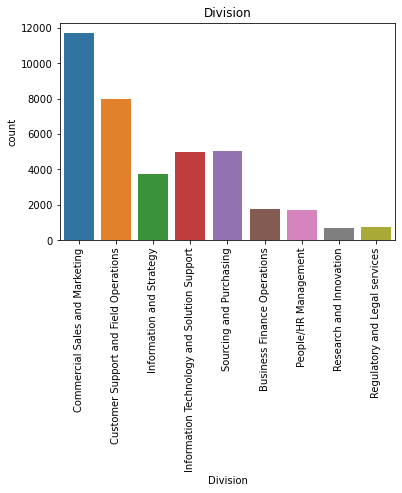

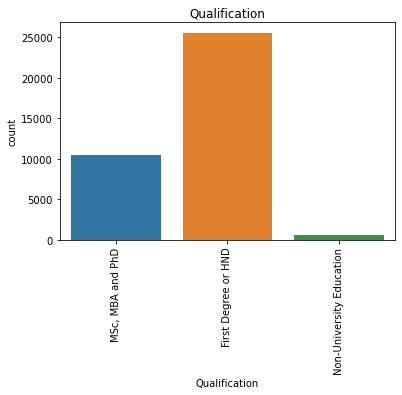

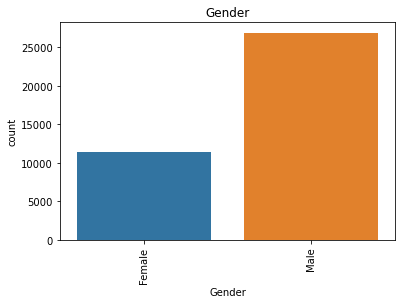

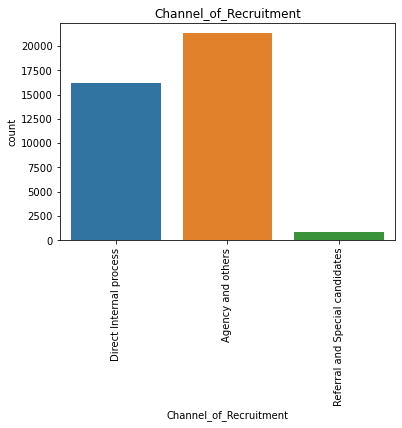

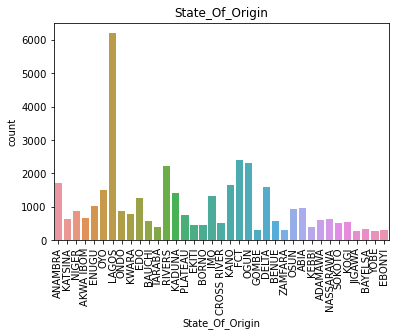

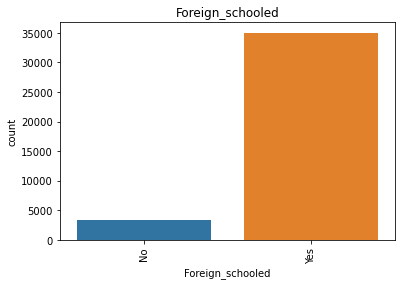

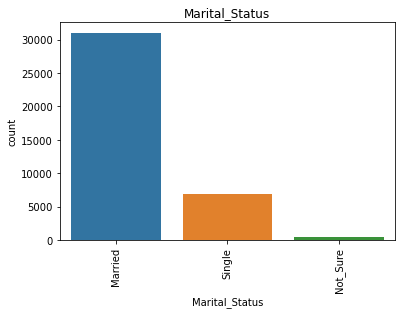

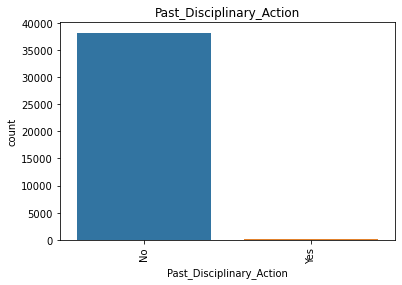

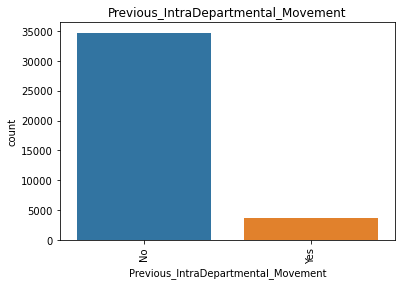

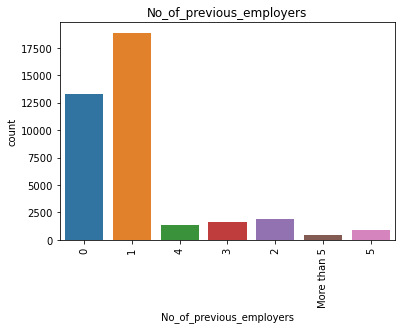

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

for col in cat_cols.index:
    if col != 'EmployeeNo':
        plt.figure()
        plot = sb.countplot(x=col, data=df_train)
        plot.set_title(col)
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        

In [8]:
# Encoding config
binary_encoding_cols = [
    'Gender',
    'Channel_of_Recruitment',
    'Foreign_schooled',
    'Marital_Status',
    'Past_Disciplinary_Action',
    'Previous_IntraDepartmental_Movement'
]

label_encoding_dict = {
    'Qualification': {'unknown': 0,
                      'Non-University Education': 1,
                      'First Degree or HND': 2,
                      'MSc, MBA and PhD': 3
                     },
    'No_of_previous_employers': {'0': 0,
                                 '1': 1,
                                 '2': 2,
                                 '3': 3,
                                 '4': 4,
                                 '5': 5,
                                 'More than 5': 6
                                }
}

target_encoding_cols = [
    'Division',
    'State_Of_Origin'
]

drop_cols = [
    'EmployeeNo'
]

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [11]:
bin_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                                  ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'))
                                 ]
                          )

preprocessor = ColumnTransformer(
    transformers=[
        ('bin', bin_transformer, binary_encoding_cols)
    ]
)

full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor)
    ]
)

test = full_pipeline.fit_transform(df_train)
pd.DataFrame(test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38308,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38309,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38310,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [257]:
# Feature selector
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names):
        self._feature_names = feature_names
    
    
    def fit(self, X, y = None):
        return self 
    
    
    def transform(self, X, y=None):
        return pd.DataFrame(X[self._feature_names])

In [258]:
class CustomImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, strategy='constant', fill_value='unknown'):
        self.__strategy = 'constant'
        self.__fill_value = 'unknown'
    
    
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X, y=None):
        if self.__strategy == 'constant':
            for col in X.columns:
                if X[col].dtype == object:
                    X[col] = X[col].fillna(self.__fill_value)
            return X
        else:
            print("That strategy is not implemented yet")

In [259]:
class LabelTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict 
    
    
    def fit(self, X, y=None):
        return self 
    
    
    def transform(self, X, y=None):
        for col in self.mapping_dict.keys():
            col_dict = self.mapping_dict[col]
            #TODO: extend dictionary with unseen labels. Don't put them in one class -1
            X[col] = X[col].apply(lambda x: col_dict[x] if x in col_dict.keys() else -1)
        return X

In [260]:
class OneHotEncoderPostProcessor(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names, one_hot_encoder):
        self.__feature_names = feature_names
        self.__one_hot_encoder = one_hot_encoder
        
    
    
    def fit(self, X, y=None):
        self.__categories = self.__one_hot_encoder.categories_
        return self
    
    
    def transform(self, X, y=None):
        col_names = []
        for feature, categories in zip(self.__feature_names, self.__categories):
            for category in categories:
                col_names.append(feature + '_' + category)
                
        df_X = pd.DataFrame(X.toarray(), columns=col_names)
        
        return df_X

In [261]:
ohe = OneHotEncoder(handle_unknown='ignore')
bin_pipeline = Pipeline(steps=[('bin_enc_selector', FeatureSelector(binary_encoding_cols)),
                               ('imputer', CustomImputer(strategy='constant', fill_value='unknown')),
                               ('one-hot-encoder', ohe),
                               ('one-hot-encoder-post-processing', OneHotEncoderPostProcessor(binary_encoding_cols,
                                                                                              bin_pipeline['one-hot-encoder']
                                                                                             ))
                              ]
                       )
cat_pipeline = Pipeline(steps=[('label_enc_selector', FeatureSelector(label_encoding_dict.keys())),
                               ('imputer', CustomImputer(strategy='constant', fill_value='unknown')),
                               ('label-encoder', LabelTransformer(label_encoding_dict))
                              ]
                       )

# num_pipeline = Pipeline(steps=[()
#                               ]
#                        )

In [262]:
test = cat_pipeline.fit_transform(df_train)
test

,Qualification,No_of_previous_employers
0,3,0
1,2,0
2,2,0
3,2,1
4,2,1
...,...,...
38307,2,0
38308,3,1
38309,2,3
38310,0,1


In [256]:
test_bin = bin_pipeline.fit_transform(df_train)
test_bin

Called fit FS
Called transform FS
Called fit CI
Called transform CI
['x0_Female' 'x0_Male' 'x1_Agency and others' 'x1_Direct Internal process'
 'x1_Referral and Special candidates' 'x2_No' 'x2_Yes' 'x3_Married'
 'x3_Not_Sure' 'x3_Single' 'x4_No' 'x4_Yes' 'x5_No' 'x5_Yes']


,Gender_Female,Gender_Male,Channel_of_Recruitment_Agency and others,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_No,Foreign_schooled_Yes,Marital_Status_Married,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_No,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38308,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38309,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38310,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [155]:
for col, cat in zip(binary_encoding_cols, bin_pipeline['one-hot-encoder'].categories_):
    print(col, '\t', cat)

Gender 	 ['Female' 'Male']
Channel_of_Recruitment 	 ['Agency and others' 'Direct Internal process'
 'Referral and Special candidates']
Foreign_schooled 	 ['No' 'Yes']
Marital_Status 	 ['Married' 'Not_Sure' 'Single']
Past_Disciplinary_Action 	 ['No' 'Yes']
Previous_IntraDepartmental_Movement 	 ['No' 'Yes']
